## INTRODUCTION

### In this notebook, gender will be predicted with Logistic Regression algorithm. I will apply this algorithm by hand, I won't use scikit-learn library directly.
The steps of the work is below

**1. EDA(Expolatory Data Analysis) for the Gender Recognition by Voice dataset**

   * [Getting familiar with the dataset](#get-familiar)
    
**2. Normalization (If needed)**

* [Normalization](#normalization)

**3. Logistic Regression implementation with python (Scikit-learn library will be used different parts of the algorithm)**

* [Choosing train-test split randomly](#traintest)

* [Initialize Parameters (w,b)](#initparam)

* [Implementing Sigmoid function](#sigmoid)

* [Calculation of cost-loss function](#cost)

* [Forward-Backward function](#fb)

* [Purpose of the Derivation *-(Optimization)*](#derivation)

* [Updating Weight and Bias](#update)

* [Prediction](#predict)

* [Logistic Regression](#lr)

* [Interpreting the result via visualization](#visualization)

**[References](#references)**


<a id="get-familiar"></a> <br>
## Getting familiar with the dataset

In [1]:
# Import libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

data = pd.read_csv('voice.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


***IS THERE ANY MISSING FEATURE VALUE?***

We can see that, there is no missing data.

In [2]:
# Top 10 records in the dataset
data.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


***TRANSLATE MALE-FEMALE OPTIONS TO COMPUTER'S LANGUAGE***

In order to make train,test, and prediction, we have to convert our binary male-female option into 0-1's. I choose male as '0' and female as '1'. 

In [3]:
data.label = [1 if each=='female' else 0 for each in data.label]
# Our y-axis(Outcome)
y = data.label.values
# Our features for prediction&training, x will include all of data except the outcome(label)
x_data = data.drop(["label"],axis=1)

 <a id="normalization"></a> <br>
 ## NORMALIZATION

Normalization have to applied to dataset, because some features can brake the balance with their proportion to other features like kurtosis and skew. These attributes should be re-scaled.

In [4]:
# Find the max&min value of the each column then apply the formula. This is a way to re-scaling
x = (x_data -np.min(x_data))/(np.max(x_data)-np.min(x_data)).values
print(x.head().kurt)

<bound method DataFrame.kurt of    meanfreq        sd    median       Q25       Q75       IQR      skew  \
0  0.096419  0.473409  0.084125  0.060063  0.204956  0.254828  0.367853   
1  0.125828  0.505075  0.116900  0.077635  0.215683  0.246961  0.644279   
2  0.179222  0.675536  0.102873  0.034284  0.385912  0.457148  0.885255   
3  0.528261  0.554611  0.587559  0.389906  0.715802  0.407358  0.031549   
4  0.452195  0.627209  0.454272  0.317627  0.707515  0.474474  0.027742   

       kurt    sp.ent       sfm      mode  centroid   meanfun    minfun  \
0  0.208279  0.635798  0.564526  0.000000  0.096419  0.157706  0.030501   
1  0.483766  0.630964  0.591578  0.000000  0.125828  0.287642  0.031140   
2  0.782275  0.442738  0.548382  0.000000  0.179222  0.236945  0.030264   
3  0.001613  0.923261  0.856457  0.299565  0.528261  0.183442  0.041287   
4  0.001732  0.958736  0.926348  0.372362  0.452195  0.279190  0.036829   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  
0 

## Logistic Regression Steps

Logistic Regression Algorithm's steps are represented below in computation graph way:

![](https://rasbt.github.io/mlxtend/user_guide/classifier/LogisticRegression_files/logistic_regression_schematic.png)
*Source: [https://rasbt.github.io/mlxtend/user_guide/classifier/LogisticRegression_files/logistic_regression_schematic.png](http://)*

 <a id="traintest"></a> <br>
 ## TRAIN TEST SPLIT

20% of the data will be used for the test, rest of the data will be used for the training.

In [5]:
# Select Train-Test split randomly every-time
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)
x_train=x_train.T
x_test=x_test.T
y_train=y_train.T
y_test=y_test.T

# Features - Records
print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (20, 2534)
x_test:  (20, 634)
y_train:  (2534,)
y_test:  (634,)


<a id="initparam"></a> <br>
## Initializing Parameters 

In [6]:
# Initialize Parameters(dimensin = count of the features)
def initialize_weight_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b=0.0
    return w,b

<a id="sigmoid"></a> <br>
## IMPLEMENTING SIGMOID FUNCTION

Sigmoid function is the one of the magical function from the mathland. It scales our data to probabilistic values. All of data will be represented in between 0 and 1 correctly. 
After the implementation we can check the correctness the function f(0)=0.5. 
Here is the graph and formula of the sigmoid function.

![](https://rasbt.github.io/mlxtend/user_guide/classifier/LogisticRegression_files/logistic_function.png)

*Figure1 : https://rasbt.github.io/mlxtend/user_guide/classifier/LogisticRegression_files/logistic_function.png*

In [7]:
# Sigmoid function
# Calculation of z
# z = np.dot(w.T,x_train)+b
def sigmoid(z):
    return 1/(1+np.exp(-z))
# test
print(sigmoid(0))

0.5


<a id="cost"></a> <br>
## Cost/Loss Function
We want to minimize the cost, hence we will take derivative of the funvtion then, when the derivative equal to zero the root of the function gives to minimum value. 

![](http://image.ibb.co/dFCR3H/6.jpg)
Figure 3 : Loss function **(Cross Entropy Formula)**

In [8]:
# Forward and Backward Propogarion Combined
def ForwardBackwardP(w,b,x_train,y_train):
    #Forward Propogation
    z = np.dot(w.T,x_train)+b # Multiply with weight then sum each data
    y_head = sigmoid(z) # Scale the result into a probablistic value
    
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)
    # Cost is summation of all losses
    cost = (np.sum(loss))/x_train.shape[1] # x_train.shape[1] is count of the samples
    # Divided to sample size because of scaling
    
    # Backward Propogation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    # Save into Dictionary
    gradients = {"derivative_weight":derivative_weight,"derivative_bias":derivative_bias}
    return cost,gradients

<a id="derivation"></a> <br>
## PURPOSE OF THE DERIVATION

![](http://image.ibb.co/dAaYJH/7.jpg)
Figure 4 : Purpose of the Derivation

<a id="update"></a> <br> 
# Update Learning Parameters (Weights and Bias)

Algorithm should update the weights and bias by number of iterations. While we doing this, we will use **learning_rate parameter** It is coefficient of derivatives and it is a *hyperparameter*. So it means we should tune value of the paramter by manually.

![](http://image.ibb.co/hYTTJH/8.jpg)
> Alpha value = learning_rate

In [9]:
# Updating Learning Parameters(wi,b)
def update(w,b,x_train,y_train,learning_rate,iterations):
    cost_list = []
    cost_list2 = []
    index = []
    
    # Updating learning parameters by number of iterations
    for i in range(iterations):
        # Make forward and backward propogation and find cost and gradients
        cost,gradients = ForwardBackwardP(w,b,x_train,y_train)
        cost_list.append(cost)
        #UPDATE
        w = w- learning_rate*gradients["derivative_weight"]
        b = b- learning_rate*gradients["derivative_bias"]
        
        if i % 10 == 0:
            cost_list2.append(cost)
            index.append(i)
            print("Cost after iteration %i: %f" %(i,cost))
            
        # Update learn parameters and bias
        parameters = {"weight":w,"bias":b}
        
    # Plot
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

<a id="predict"></a> <br>
# Prediction

In [10]:
def predict(w,b,x_test):
    z = sigmoid(np.dot(w.T,x_test)+b) # Forward propogation for x_test
    Y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(z.shape[1]):
        if z[0,i]<=0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1
    return Y_prediction
    

<a id="lr"></a> <br>
## Logistic Regression

Cost after iteration 0: 0.692360
Cost after iteration 10: 0.570539
Cost after iteration 20: 0.510995
Cost after iteration 30: 0.472210
Cost after iteration 40: 0.442623
Cost after iteration 50: 0.418237
Cost after iteration 60: 0.397345
Cost after iteration 70: 0.379065
Cost after iteration 80: 0.362863
Cost after iteration 90: 0.348376


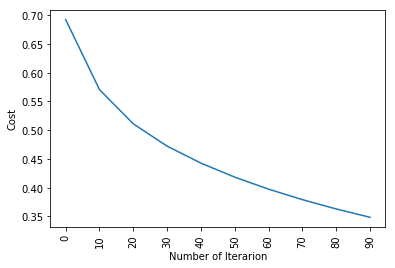

train accuracy: 90.60773480662984 %
test accuracy: 92.74447949526814 %


In [11]:
def logistic_regression(x_train,y_train,x_test,y_test,learning_rate,iterations):
    # Initialize 
    dimension = x_train.shape[0] # Feature size
    w,b = initialize_weight_and_bias(dimension)
    
    parameters, gradients, cost_list = update(w,b,x_train,y_train,learning_rate,iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)
    y_prediction_train = predict(parameters["weight"],parameters["bias"],x_train)
    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
    return y_prediction_test
    
y_pred_test = logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 1, iterations = 100)


In [12]:
# Top 20 prediction and real values
head_y_pred= ["Female" if each == 1 else "Male" for each in y_pred_test[0][:20]]
head_y_real = ["Female" if each == 1 else "Male" for each in y_test[:20]]
print(head_y_pred)
print(head_y_real)

['Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male', 'Female', 'Female', 'Male']
['Female', 'Male', 'Male', 'Female', 'Female', 'Female', 'Male', 'Male', 'Female', 'Male', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Female', 'Male']


<a id="visualization"></a> <br>
# Visualization
## Rate of the Male-Female Predictions

In [13]:
# Count of male-female
male_count = 0 
female_count = 0
for i in range(y_pred_test.shape[1]):
    if y_pred_test[0][i] == 0:
        male_count+=1
    else:
        female_count+=1

# Visualization
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

labels = ['Male','Female']
values = [male_count,female_count]

trace = go.Pie(labels=labels, values=values)

py.iplot([trace], filename='basic_pie_chart')

## Rate of male-female for real test data
We can see accuracy of the our prediction

In [14]:
# Calculation of rate of raw test data
male_test=0
female_test=0
for i in y_test:
    if i == 0:
        male_test+=1
    else:
        female_test+=1

values = [male_test,female_test]
trace = go.Pie(labels=labels, values=values)
py.iplot([trace], filename='basic_pie_chart')

<a id="references"></a> <br>
# References

*  References : This work is includes some parts of 'kanncaa1's deep-learning kernel. Thanks for sharing.*
*  Source: https://www.kaggle.com/kanncaa1/deep-learning-tutorial-for-beginners*